<h1>CYCLISTIC: CONVERTING CASUAL RIDERS INTO MEMBERS</h1>

Author: [Giang Son Nguyen](https://www.linkedin.com/in/nguyengiangson/). <br>
Date: 11.08.2021 <br>
Visit my portfolio at: [giangson.tech](giangson.tech)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Step-1:-Ask" data-toc-modified-id="Step-1:-Ask-1">Step 1: Ask</a></span></li><li><span><a href="#Step-2:-Prepare" data-toc-modified-id="Step-2:-Prepare-2">Step 2: Prepare</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#1.-Data-location-and-organization" data-toc-modified-id="1.-Data-location-and-organization-2.0.1">1. Data location and organization</a></span></li><li><span><a href="#2.-Data-collection" data-toc-modified-id="2.-Data-collection-2.0.2">2. Data collection</a></span></li><li><span><a href="#3.-Data-inspection" data-toc-modified-id="3.-Data-inspection-2.0.3">3. Data inspection</a></span></li></ul></li></ul></li><li><span><a href="#Step-3:-Process" data-toc-modified-id="Step-3:-Process-3">Step 3: Process</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#1.-Clean-data" data-toc-modified-id="1.-Clean-data-3.0.1">1. Clean data</a></span></li><li><span><a href="#2.-Create-new-columns" data-toc-modified-id="2.-Create-new-columns-3.0.2">2. Create new columns</a></span></li></ul></li></ul></li><li><span><a href="#Step-4:-Analyze" data-toc-modified-id="Step-4:-Analyze-4">Step 4: Analyze</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Key-findings" data-toc-modified-id="Key-findings-4.0.1">Key findings</a></span></li></ul></li></ul></li><li><span><a href="#Step-5:-Share" data-toc-modified-id="Step-5:-Share-5">Step 5: Share</a></span></li><li><span><a href="#Step-6:-Act" data-toc-modified-id="Step-6:-Act-6">Step 6: Act</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Top-3-Recommendations:" data-toc-modified-id="Top-3-Recommendations:-6.0.1">Top 3 Recommendations:</a></span></li></ul></li></ul></li></ul></div>

# INTRODUCTION

This case study is part of the [***Google Data Analytics Capstone Project***](https://www.coursera.org/learn/google-data-analytics-capstone/) on Coursera.
<br> The data used in this project is the public [Divvy trip history dataset](https://www.divvybikes.com/system-data).

In this project, I will be acting as a junior data analyst for a fictional company *Cyclistic*. My task is to perform [6 steps in the data analysis process](https://www.coursera.org/lecture/foundations-data/six-steps-of-data-analysis-JjA1f) and produce a **report** with the corresponding deliverables:
1. **Ask**: A clear statement of the business task
2. **Prepare**: A description of all data sources used
3. **Process**: Documentation of any cleaning or manipulation of data
4. **Analyze**: A summary of my analysis
5. **Share**: Supporting visualizations and key findings
6. **Act**: Top three recommendations based on my analysis

The tools I will use for this project are: 
- R programming language
- Tableau

# REPORT

In [1]:
# Import libraries
shhh <- suppressPackageStartupMessages #do this to hide ("supress") the warnings when loading libraries
start_time <- Sys.time() #measure notebook runtime

shhh(library(rvest)) #for webscraping
shhh(library(tidyverse)) #for working with data
shhh(library(lubridate)) #for working with datetime data
shhh(library(data.table)) #for faster aggregating
library(ggthemes) #for custom ggplot themes

Warning message:
"package 'ggthemes' was built under R version 3.6.3"

## Step 1: Ask

**Briefing** <br>
*Cyclistic* is a company based in Chicago, US. It provides bide-sharing service with 5800 bikes and 600 docking stations. *Cyclistic* categorizes its customers into 2 types: 
- annual members (people wwho purchase annual memberships)
- casual riders (people who buy single-ride or full-day passes).

The finance team concludes that annual members bring significantly larger profits than casual riders. To maximize the number of annual members, the marketing team wants to launch a campaign that covert casual customers into members.

To help achieve that goal, I - the data analyst - need to **analyze the trip data** from the past year, generate usefull insights, and provide my suggestions for further actions.

**Business objetive** <br>
>Derive a marketing program to **convert** *Cyclistic*'s casual riders into annual members to increase profits.

**My task** <br>
Analyze the data and provide an answer to the question:
> How do annual members and casual riders use Cyclistic bikes differently?


## Step 2: Prepare

#### 1. Data location and organization
**Cyclistic** stores all their trip data in a single folder, which can be accessed at this URL: https://divvy-tripdata.s3.amazonaws.com/index.html. The data is collected at a ride-level: each row contains information (detailed below) about one single trip.

The recent data is organized into **monthly** files (each file contains trip data for a single month). All of these files contain 13 columns, the names of which are consistent accross all files. A description of these columns are presented in the next section.

Previously (before April 2020), *Cyclistic* used to sort its data differently (quartery/ annually) and used different attributes. I won't go into details since this information is mostly irrelevant.

For the purpose of this case study, I'll perform analysis on the data from the lastest 12 months at the time of writing (June 2020 to May 2021).

#### 2. Data collection
I use the below script to scrape the data from its source and save it onto my computer. Alternatively, this task could be done manually without taking too much time.

###### a. Download monthly data

```r
# Scrape the source website for links to the last 12 months of data.
root <- "https://divvy-tripdata.s3.amazonaws.com/"
index <- read_html(root)

# Get the zip file names: elements with the tag <key> and the word tripdata
zip_names <- index  %>% 
    html_nodes("key")  %>% 
    html_text()
    list()
zip_names <- grep("tripdata", zip_names, value=TRUE)

# Only get 12 months of data
zip_names <- tail(zip_names, 12)


#Load the data directly from the source, then save as csv files
for (zip_name in zip_names){
    # assign the url to the zip file
    url <- paste(root, zip_name,sep="")
    # assign the name of the actual csv file
    csv_name <- paste(substring(zip_name,1,nchar(zip_name)-4), ".csv",sep="")
    
    # load the data from the csv inside the zip file
    temp <- tempfile()
    download.file(url, temp)
    montly_data <- read_csv(unz(temp, csv_name), 
                     col_types = cols(end_station_id  = col_character(), 
                                      start_station_id  = col_character())) #have to specify column types
    
    # save the monthly data as csv
    write_csv(montly_data, paste('data',csv_name,sep="/"))
}

print("Finished downloading all files.")
```

###### b. Combine 12 files into a year view

```r
# Define a function to read csv files later
# Have to do this because I need to specify the column types while reading to avoid errors 
read_files <- function(file){
    read_csv(file, col_types = cols(end_station_id  = col_character(), 
                                      start_station_id  = col_character()))
}

# Get the directories to the csv files
files <- list.files(path = "data/", pattern = ".*csv")
# Read all the files and combine them into one dataframe
df_list <- lapply(paste("data/",files,sep=""), read_files)
all_data <- bind_rows(df_list)

# Save a copy of the 12-month data
write_csv(all_data, 'all-tripdata.csv')
```

#### 3. Data inspection

***About the dataset***<br>
A quick glance at the dataset shows that this dataset consists of:
1. 4073561 entries (4073561 trips)
2. 13 attributes

<details>
    <summary> ▶ &nbsp; Click to see the description of attributes </summary>
       1. `ride_id`: ID attached to each trip taken, <br>
       2. `rideable_type`: the type of the bike rented in that trip <br>
       3. `started_at`: start time of the ride <br>
       4. `ended_at`: end time of the ride <br>
       5. `start_station_name`: name of the station where the trip originated <br>
       6. `start_station_id`: unique ID of the station where the trip originated <br>
       7. `end_station_name`:  name of the station where the trip terminated <br>
       8. `end_station_id`: unique ID of the station where the trip terminated <br>
       9. `start_lat`: latitude of the start station <br>
       10. `start_lng`: longitude of the start station <br>
       11. `end_lat`: latitude of the end station <br>
       12. `end_lng`: longitude of the end station <br>
       13. `member_casual`: the type of membership of the rider (either casual rider or annual member).<br>
    
</details>

***Checking for issues***<br>
1. Issues regarding *licensing, privacy, security,* and *accessibility* are taken care of by the **Cyclistic** team and not by myself.


2. As for the data's *integrity*, I have been informed that the dataset is clean and ready to use, save for one problem. I have performed some preliminary checks myself and conluded that there is no other major issue.
    - **Check-in entries**: Some entries were not trips taken by riders, but were regular check-ins by **Cylistic**. <br>
        These entries has negative ride duration (`started_at` > `ended_at`) and will interfere with the analysis. They must be removed.
        
    

In [2]:
# Load all data
all_data <- read_csv('all-tripdata.csv',
                     col_types = cols(end_station_id  = col_character(), 
                                      start_station_id  = col_character()))

In [3]:
print(paste("This data has", dim(all_data)[1], "rows and", dim(all_data)[2],"columns"))
print("First 6 rows:")
head(all_data)  #See the first 6 rows of data frame.

[1] "This data has 4073561 rows and 13 columns"
[1] "First 6 rows:"


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
8CD5DE2C2B6C4CFC,docked_bike,2020-06-13 23:24:48,2020-06-13 23:36:55,Wilton Ave & Belmont Ave,117,Damen Ave & Clybourn Ave,163,41.94018,-87.65304,41.93193,-87.67786,casual
9A191EB2C751D85D,docked_bike,2020-06-26 07:26:10,2020-06-26 07:31:58,Federal St & Polk St,41,Daley Center Plaza,81,41.87208,-87.62954,41.88424,-87.62963,member
F37D14B0B5659BCF,docked_bike,2020-06-23 17:12:41,2020-06-23 17:21:14,Daley Center Plaza,81,State St & Harrison St,5,41.88424,-87.62963,41.87405,-87.62772,member
C41237B506E85FA1,docked_bike,2020-06-20 01:09:35,2020-06-20 01:28:24,Broadway & Cornelia Ave,303,Broadway & Berwyn Ave,294,41.94553,-87.64644,41.97835,-87.65975,casual
4B51B3B0BDA7787C,docked_bike,2020-06-25 16:59:25,2020-06-25 17:08:48,Sheffield Ave & Webster Ave,327,Wilton Ave & Belmont Ave,117,41.92154,-87.65382,41.94018,-87.65304,casual
D50DF288196B53BE,docked_bike,2020-06-17 18:07:18,2020-06-17 18:18:14,Sheffield Ave & Webster Ave,327,Wilton Ave & Belmont Ave,117,41.92154,-87.65382,41.94018,-87.65304,casual


In [4]:
# check for duplicates
# no duplicate
# sum(duplicated(data))

In [5]:
# check for missing values
# missing values in the name, id and location of stations
# can be ignored
colSums(is.na(all_data))

ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
            201975             202601             229190             229651 
         start_lat          start_lng            end_lat            end_lng 
                 0                  0               5037               5037 
     member_casual 
                 0

## Step 3: Process

To make the data analysis-ready, I've performed some processing steps, including:
- cleaning the data 
- creating new columns that will be used for analysis.

Since the data manipulation is rather extensive, I decide to perform the changes on a copy of the dataset instead of using the original.

Below is the list of all the changes that have been made:
1. Removed 10336 rows where `started_at` > `ended_at`
2. Added column `ride_length` (= `ended_at` - `started_at`)
3. Added column `hour` (hour of the day of `started_at`
4. Added column `day_of_week` (the day of the week of `started_at`)
5. Added column `month` (the month of `started_at`)


The new dataset contains: 4063225 rows and 17 columns.

#### 1. Clean data

In [6]:
# remove bad data and save as a new dataframe
data <- all_data[!(all_data$started_at > all_data$ended_at),]

# see how many rows were removed
rows_removed <- dim(all_data)[1] - dim(data)[1]
paste(rows_removed, "rows have been removed.")

[1] "10336 rows have been removed."

#### 2. Create new columns

In [7]:
# month column
data$month <- lubridate::month(data$started_at, label = TRUE)

# day_of_week column
data$day_of_week <- lubridate::wday(data$started_at, label = TRUE, week_start = 1)

# hour column
data$hour <- lubridate::hour(data$started_at)

In [8]:
# calculate ride_length (in seconds)
data$ride_length <- difftime(data$ended_at,data$started_at)
head(data$ride_length,10)
data$ride_length <- as.numeric(as.character(data$ride_length))

Time differences in secs
 [1]  727  348  513 1129  563  656  398  499 1267  642

In [9]:
# inspecting the new dataframe
print(paste("The new dataframe has", dim(data)[1], "rows and", dim(data)[2],"columns"))
head(data)

[1] "The new dataframe has 4063225 rows and 17 columns"


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month,day_of_week,hour,ride_length
8CD5DE2C2B6C4CFC,docked_bike,2020-06-13 23:24:48,2020-06-13 23:36:55,Wilton Ave & Belmont Ave,117,Damen Ave & Clybourn Ave,163,41.94018,-87.65304,41.93193,-87.67786,casual,Jun,Sat,23,727
9A191EB2C751D85D,docked_bike,2020-06-26 07:26:10,2020-06-26 07:31:58,Federal St & Polk St,41,Daley Center Plaza,81,41.87208,-87.62954,41.88424,-87.62963,member,Jun,Fri,7,348
F37D14B0B5659BCF,docked_bike,2020-06-23 17:12:41,2020-06-23 17:21:14,Daley Center Plaza,81,State St & Harrison St,5,41.88424,-87.62963,41.87405,-87.62772,member,Jun,Tue,17,513
C41237B506E85FA1,docked_bike,2020-06-20 01:09:35,2020-06-20 01:28:24,Broadway & Cornelia Ave,303,Broadway & Berwyn Ave,294,41.94553,-87.64644,41.97835,-87.65975,casual,Jun,Sat,1,1129
4B51B3B0BDA7787C,docked_bike,2020-06-25 16:59:25,2020-06-25 17:08:48,Sheffield Ave & Webster Ave,327,Wilton Ave & Belmont Ave,117,41.92154,-87.65382,41.94018,-87.65304,casual,Jun,Thu,16,563
D50DF288196B53BE,docked_bike,2020-06-17 18:07:18,2020-06-17 18:18:14,Sheffield Ave & Webster Ave,327,Wilton Ave & Belmont Ave,117,41.92154,-87.65382,41.94018,-87.65304,casual,Jun,Wed,18,656


## Step 4: Analyze

Based on the available data, I will analyze 2 key metrics: 
- number of rides
- ride duration (in seconds)

and break them down by: 
- type of membership
- type of bike used
- month when the trip started
- day of the week when the trip started
- time of day when the trip started
- start and end stations

###### Overall 

In [10]:
overall <- setDT(data)[,list(mean_ride_length = mean(ride_length), 
                             number_of_rides = .N)]
overall

mean_ride_length,number_of_rides
1617.009,4063225


###### By membership

In [11]:
by_membership <- setDT(data)[,list(mean_ride_length = mean(ride_length),
                                   total_ride_length = sum(ride_length),
                                   number_of_rides = .N, 
                                   percent_of_rides = .N/dim(data)[1]), 
                             by = 'member_casual']
by_membership

member_casual,mean_ride_length,total_ride_length,number_of_rides,percent_of_rides
casual,2561.782,4381117781,1710184,0.4208933
member,930.351,2189154015,2353041,0.5791067


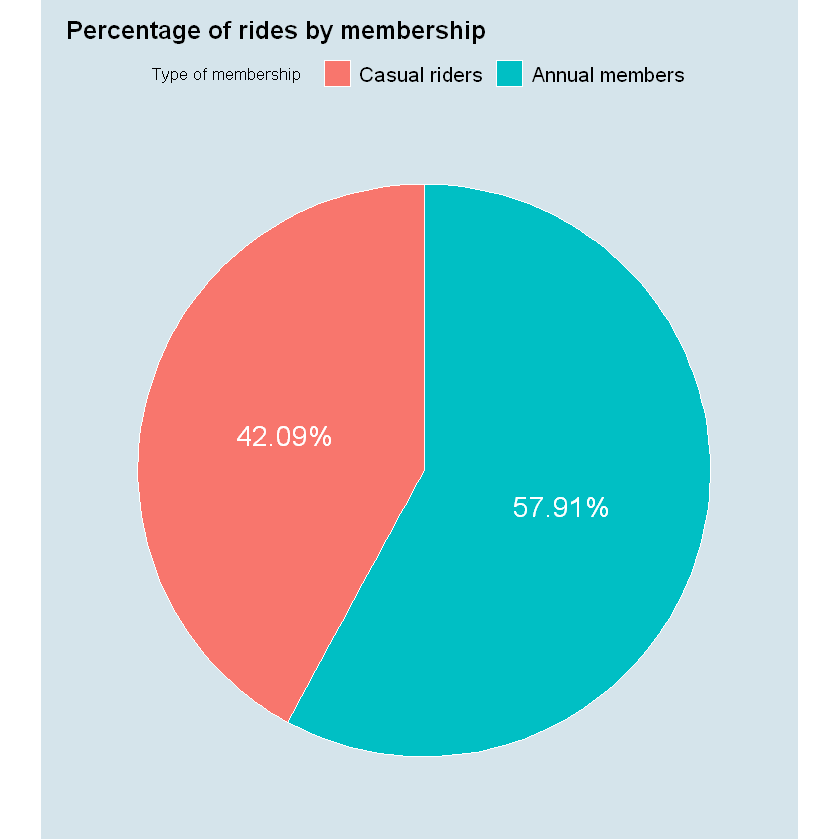

In [12]:
by_membership  %>% 
    arrange(desc(member_casual)) %>%
    mutate(percent_of_rides = percent_of_rides*100)  %>% 
    mutate(ypos = cumsum(percent_of_rides) - percent_of_rides*0.5)  %>% 

    # making a pie chart in ggplot is a bit tricky
    ggplot(aes(x="", y=percent_of_rides, fill=member_casual)) +
    ggtitle("Percentage of rides by membership") +
    geom_bar(stat="identity", width=1, color="white") +
    coord_polar("y", start=0) +
    geom_text(aes(y = ypos, label = paste0(round(percent_of_rides, 2),"%")), color = "white", size=6) + 
    scale_fill_discrete(name = "Type of membership", labels = c("Casual riders", "Annual members")) +
    theme_economist() +
    theme(axis.title.x = element_blank(),
          axis.title.y = element_blank(),
          axis.text.x=element_blank(),
          axis.line=element_blank(),
          panel.border = element_blank(),
          panel.grid=element_blank(),
          axis.ticks = element_blank())

###### By bike type

In [13]:
by_bike_type <- setDT(data)[,list(mean_ride_length = mean(ride_length), number_of_rides = .N, percent_of_rides = .N/dim(data)[1]), 
                                  by = 'rideable_type']
by_bike_type

rideable_type,mean_ride_length,number_of_rides,percent_of_rides
docked_bike,1994.031,2331368,0.5737728
electric_bike,1014.723,888278,0.2186140
classic_bike,1209.246,843579,0.2076132


###### By membership and bike type

In [14]:
by_membership_and_bike_type <- setDT(data)[order(member_casual),
                                           list(mean_ride_length = mean(ride_length), 
                                                number_of_rides = .N),                
                                           by = 'member_casual,rideable_type']
by_membership_and_bike_type

member_casual,rideable_type,mean_ride_length,number_of_rides
casual,docked_bike,3162.7465,1071021
casual,electric_bike,1298.6042,373637
casual,classic_bike,1915.2296,265526
member,docked_bike,1000.8776,1260347
member,electric_bike,808.6219,514641
member,classic_bike,884.9552,578053


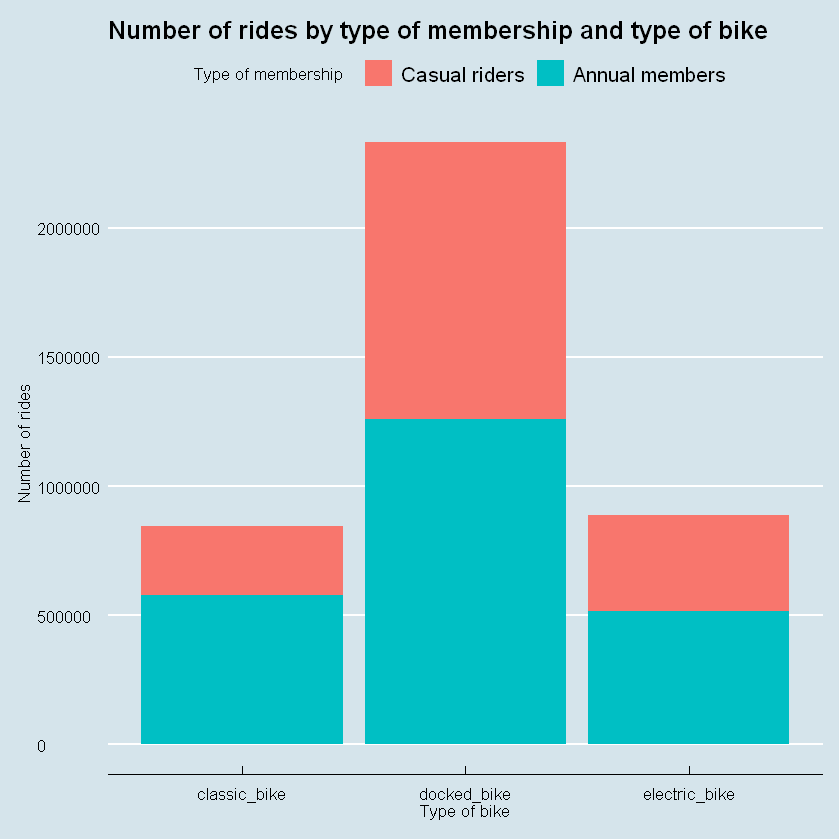

In [15]:
ggplot(data = by_membership_and_bike_type, aes(x = rideable_type, y = number_of_rides, fill = member_casual))+
    geom_col() +
    labs(title="Number of rides by type of membership and type of bike", x = "Type of bike", y = "Number of rides") +
    scale_fill_discrete(name = "Type of membership", labels = c("Casual riders", "Annual members")) +
    theme_economist()

###### By membership and month

In [16]:
by_membership_and_month <- setDT(data)[order(month,member_casual),
                                       list(number_of_rides = .N, 
                                            mean_ride_length = mean(ride_length)),
                                       by = 'month,member_casual']
by_membership_and_month

month,member_casual,number_of_rides,mean_ride_length
Jan,casual,18117,1541.0754
Jan,member,78715,772.3387
Feb,casual,10131,2962.3937
Feb,member,39491,1081.3251
Mar,casual,84032,2289.5511
Mar,member,144462,838.2031
Apr,casual,136601,2281.3794
Apr,member,200624,881.3527
May,casual,256916,2293.8580
May,member,274715,878.3410


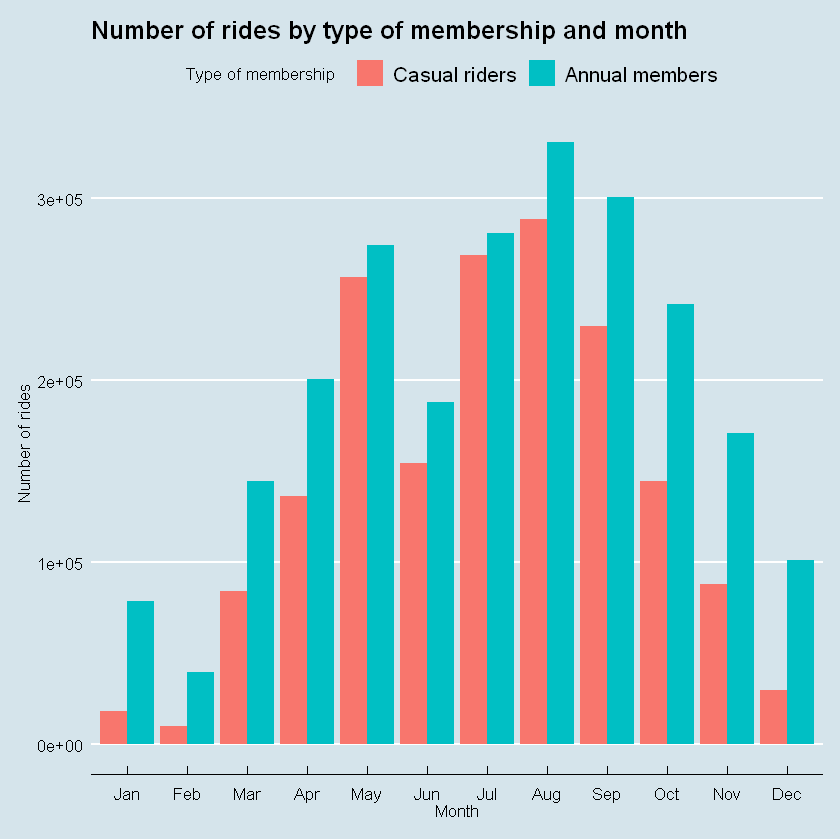

In [17]:
ggplot(data = by_membership_and_month, aes(x = month, y = number_of_rides, fill = member_casual)) + 
    geom_col(position = "dodge") +
    labs(title="Number of rides by type of membership and month", x = "Month", y = "Number of rides") + 
    scale_fill_discrete(name = "Type of membership", labels = c("Casual riders", "Annual members")) + 
    theme_economist()

###### By membership and day of week

In [18]:
by_membership_and_dayofweek <- setDT(data)[order(day_of_week,member_casual),
                                           list(number_of_rides = .N,
                                                mean_ride_length = mean(ride_length)),
                                           by = 'member_casual,day_of_week']
# Alternatively, this could be done with dplyr pipe operations - but that's much slower with a dataset as large as this one.

# create a column for weekday/weekend
weekdays <- c('Mon', 'Tue','Wed', 'Thu', 'Fri')
by_membership_and_dayofweek <- by_membership_and_dayofweek %>% 
  mutate(weekday = if_else(day_of_week %in% weekdays, "weekday", "weekend"))

by_membership_and_dayofweek

member_casual,day_of_week,number_of_rides,mean_ride_length,weekday
casual,Mon,188417,2532.9287,weekday
member,Mon,315487,895.1677,weekday
casual,Tue,174412,2280.1428,weekday
member,Tue,329416,874.3943,weekday
casual,Wed,182565,2298.7022,weekday
member,Wed,347184,888.8312,weekday
casual,Thu,191762,2394.4327,weekday
member,Thu,341971,876.8661,weekday
casual,Fri,246652,2430.1709,weekday
member,Fri,350586,912.8673,weekday


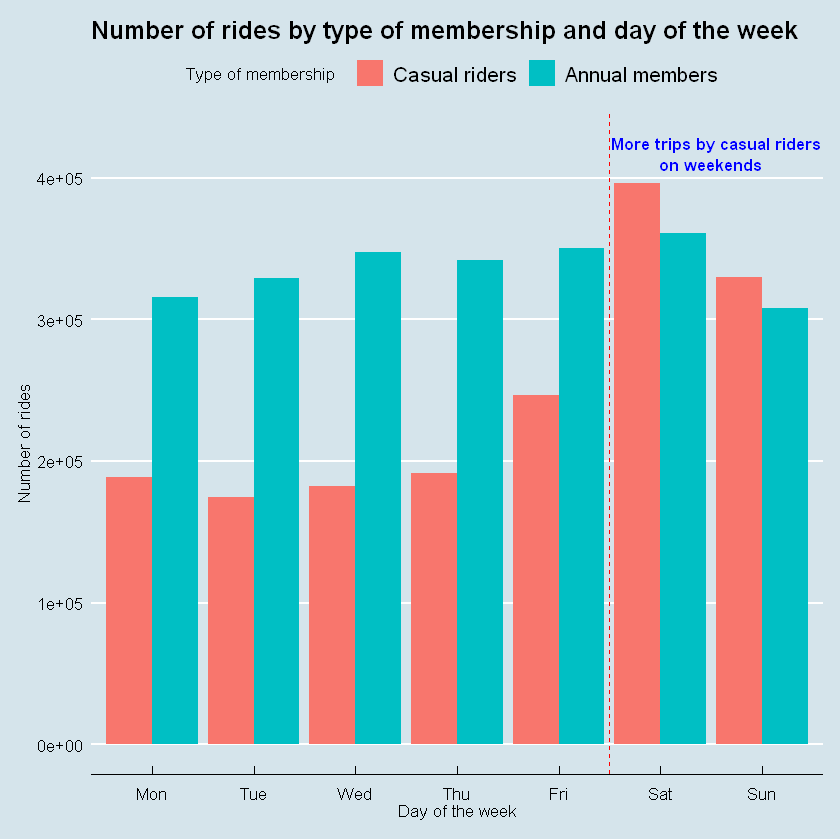

In [45]:
ggplot(data = by_membership_and_dayofweek, aes(x = day_of_week, y = number_of_rides, fill = member_casual)) + 
    geom_col(position = "dodge") +
    labs(title="Number of rides by type of membership and day of the week", x = "Day of the week", y = "Number of rides") +
    annotate(geom="text",x=6.55,y=4.25e+05, label = "More trips by casual riders", color = 'blue', size = 3.5, fontface = 2) +
    annotate(geom="text",x=6.5,y=4.1e+05, label =  "on weekends", color = 'blue', size = 3.5, fontface = 2) +
    scale_fill_discrete(name = "Type of membership", labels = c("Casual riders", "Annual members")) +
    geom_vline(xintercept = 5.5, linetype="dashed", color ="red", size = 0.5) +
    theme_economist()

ggsave("myplot.png", width = 8, height = 8)

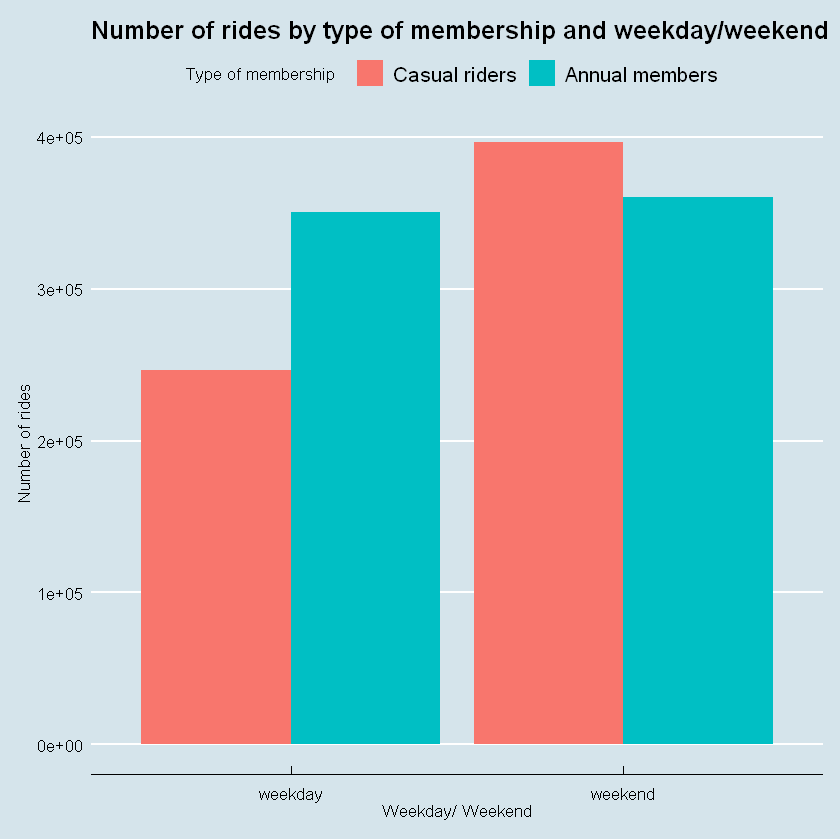

In [20]:
ggplot(data = by_membership_and_dayofweek, aes(x = weekday, y = number_of_rides, fill = member_casual)) + 
    geom_col(position = "dodge") +
    labs(title="Number of rides by type of membership and weekday/weekend", x = "Weekday/ Weekend", y = "Number of rides") +
    scale_fill_discrete(name = "Type of membership", labels = c("Casual riders", "Annual members")) +
    theme_economist()

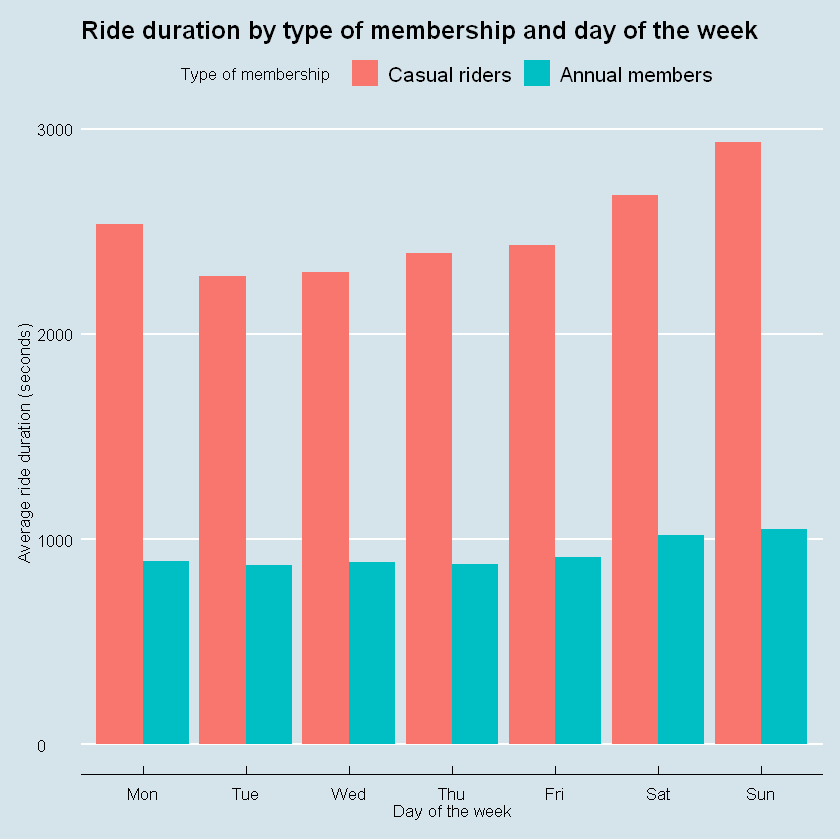

In [21]:
ggplot(data = by_membership_and_dayofweek, aes(x = day_of_week, y = mean_ride_length, fill = member_casual)) + 
    geom_col(position = "dodge") + 
    labs(title="Ride duration by type of membership and day of the week", x = "Day of the week", y = "Average ride duration (seconds)") +
    scale_fill_discrete(name = "Type of membership", labels = c("Casual riders", "Annual members")) +
    theme_economist()

###### By membership and hour

In [22]:
by_membership_and_hour <- setDT(data)[order(hour,member_casual),
                                      list(number_of_rides = .N, mean_ride_length = mean(ride_length)),
                                      by = 'member_casual,hour']

by_membership_and_hour

member_casual,hour,number_of_rides,mean_ride_length
casual,0,29401,3506.1261
member,0,16354,953.5084
casual,1,18965,4073.3859
member,1,9456,1012.5948
casual,2,10179,4261.7261
member,2,4884,855.1620
casual,3,5477,5137.1225
member,3,2977,849.2123
casual,4,4352,5281.2656
member,4,4361,889.0025


In [23]:
by_membership_and_hour  %>% 
    group_by(member_casual)  %>% 
    summarize(max_ride_length = max(mean_ride_length),
             min_ride_length = min(mean_ride_length))

member_casual,max_ride_length,min_ride_length
casual,5281.266,1609.239
member,1012.595,773.251


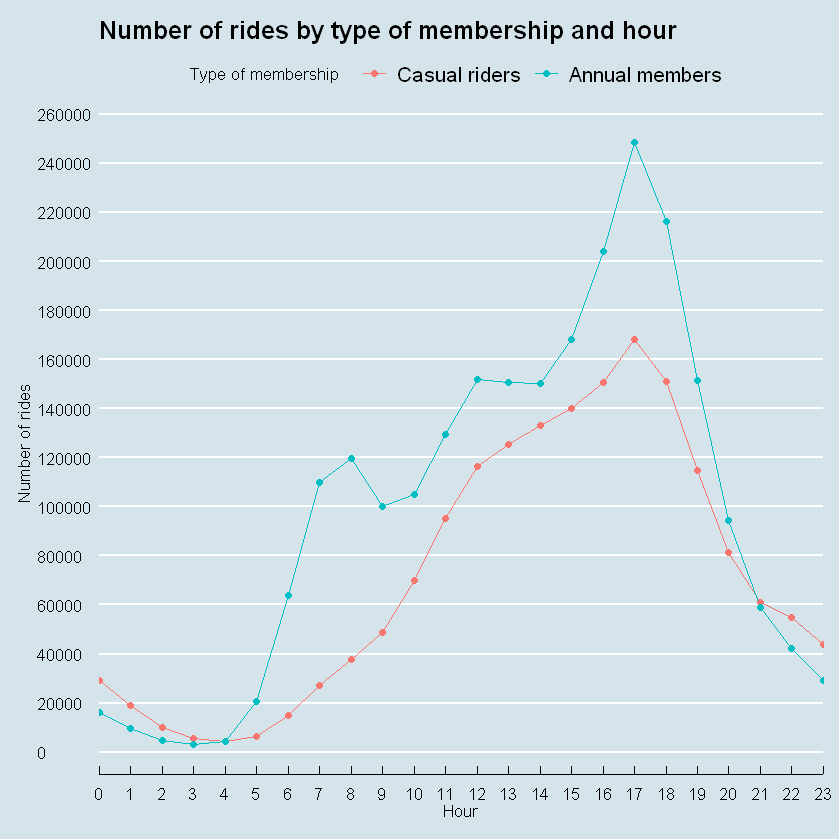

In [24]:
ggplot(data = by_membership_and_hour, aes(x = hour, y = number_of_rides, color = member_casual)) + 
    geom_line() + 
    geom_point() +
    labs(title="Number of rides by type of membership and hour", x = "Hour", y = "Number of rides") + 
    scale_x_continuous(breaks = scales::pretty_breaks(n = 23),expand = c(0, 0)) + 
    scale_y_continuous(breaks = scales::pretty_breaks(n = 10)) +
    scale_color_discrete(name = "Type of membership", labels = c("Casual riders", "Annual members")) +
    theme_economist()

###### By membership and station

In [25]:
by_membership_and_start_station <- setDT(data[start_station_name != 'NA'])[order(start_station_name,member_casual),
                                      list(number_of_rides = .N),
                                      by = 'start_station_name,member_casual']
head(by_membership_and_start_station)

start_station_name,member_casual,number_of_rides
2112 W Peterson Ave,casual,329
2112 W Peterson Ave,member,663
63rd St Beach,casual,1894
63rd St Beach,member,967
900 W Harrison St,casual,1517
900 W Harrison St,member,3010


In [26]:
top_start_station_casual <- head(by_membership_and_start_station[member_casual == 'casual'][order(-number_of_rides)], 10)
top_start_station_casual

start_station_name,member_casual,number_of_rides
Streeter Dr & Grand Ave,casual,36560
Lake Shore Dr & Monroe St,casual,28233
Millennium Park,casual,24809
Theater on the Lake,casual,18565
Michigan Ave & Oak St,casual,18362
Lake Shore Dr & North Blvd,casual,16869
Indiana Ave & Roosevelt Rd,casual,15885
Michigan Ave & Lake St,casual,13927
Shedd Aquarium,casual,13869
Clark St & Elm St,casual,13352


In [27]:
top_start_station_member <- head(by_membership_and_start_station[member_casual == 'member'][order(-number_of_rides)], 10)
top_start_station_member

start_station_name,member_casual,number_of_rides
Clark St & Elm St,member,22635
Wells St & Concord Ln,member,17680
Theater on the Lake,member,17373
Broadway & Barry Ave,member,17309
Dearborn St & Erie St,member,17186
Kingsbury St & Kinzie St,member,17084
St. Clair St & Erie St,member,16772
Wells St & Elm St,member,16522
Wells St & Huron St,member,16114
Lake Shore Dr & North Blvd,member,15533


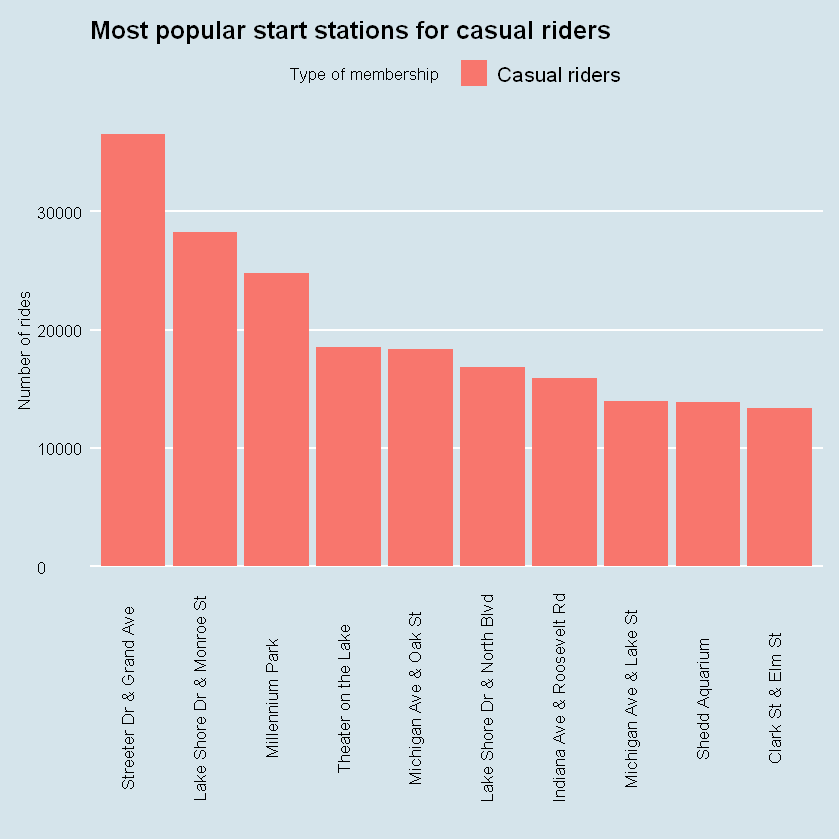

In [28]:
ggplot(data = top_start_station_casual, 
       aes (x = reorder(start_station_name, -number_of_rides),
            y = number_of_rides, fill = member_casual)) +
    geom_col() + 
    labs(title="Most popular start stations for casual riders", 
         x = "", y = "Number of rides") +
    scale_fill_discrete(name = "Type of membership", 
                        labels = c("Casual riders", "Annual members")) +
    theme_economist() + 
    theme(axis.text.x = element_text(angle = 90),
         axis.line=element_blank(),
         axis.ticks.x = element_blank())

In [29]:
by_membership_and_end_station <- setDT(data[end_station_name != 'NA'])[order(end_station_name,member_casual),
                                      list(number_of_rides = .N),
                                      by = 'end_station_name,member_casual']
head(by_membership_and_end_station)

end_station_name,member_casual,number_of_rides
2112 W Peterson Ave,casual,337
2112 W Peterson Ave,member,719
63rd St Beach,casual,1847
63rd St Beach,member,1030
900 W Harrison St,casual,1480
900 W Harrison St,member,3010


In [30]:
top_end_station_casual <- head(by_membership_and_end_station[member_casual == 'casual'][order(-number_of_rides)], 10)
top_end_station_casual

end_station_name,member_casual,number_of_rides
Streeter Dr & Grand Ave,casual,39508
Lake Shore Dr & Monroe St,casual,27169
Millennium Park,casual,25738
Theater on the Lake,casual,20801
Michigan Ave & Oak St,casual,19048
Lake Shore Dr & North Blvd,casual,17991
Indiana Ave & Roosevelt Rd,casual,15899
Michigan Ave & Lake St,casual,13328
Michigan Ave & Washington St,casual,12944
Clark St & Elm St,casual,12742


In [31]:
top_end_station_member <- head(by_membership_and_end_station[member_casual == 'member'][order(-number_of_rides)], 10)
top_end_station_member

end_station_name,member_casual,number_of_rides
Clark St & Elm St,member,23039
Wells St & Concord Ln,member,18038
St. Clair St & Erie St,member,17852
Dearborn St & Erie St,member,17800
Broadway & Barry Ave,member,17488
Kingsbury St & Kinzie St,member,17188
Theater on the Lake,member,16862
Wells St & Elm St,member,15861
Wells St & Huron St,member,15133
Lake Shore Dr & North Blvd,member,15014


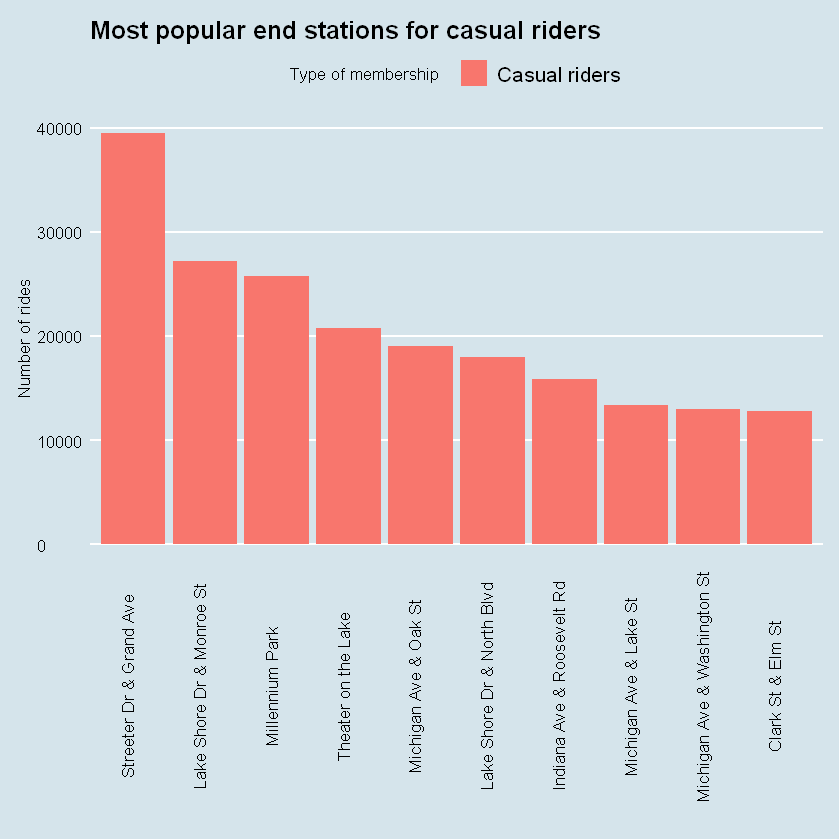

In [32]:
ggplot(data = top_end_station_casual, 
       aes (x = reorder(end_station_name, -number_of_rides),
            y = number_of_rides, fill = member_casual)) +
    geom_col() + 
    labs(title="Most popular end stations for casual riders", 
         x = "", y = "Number of rides") +
    scale_fill_discrete(name = "Type of membership", 
                        labels = c("Casual riders", "Annual members")) +
    theme_economist() + 
    theme(axis.text.x = element_text(angle = 90),
         axis.line=element_blank(),
         axis.ticks.x = element_blank())

#### Key findings

**Overview of the last 12 months**
- Total number of trips: **4063225 trips**
- Average ride duration: **26.95 minutes** (1617 seconds)
- 57.91% of rides were by annual members, while 42.09% were by casual riders
- **Docked bikes** were the most popular (accounting for 57.38% of all rides), followed by electric bikes (21.86%) and classic bikes (20.76%)

**Detailed breakdown**
- On average, casual riders' trips were **2.75 times** longer than annual members' (42.68 minutes vs 15.5 minutes). This trend (casual riders taking much longer trips) was consistent across all analysis.


- The average number of rides by casual riders on weekends (363188) were **1.84 times** as high as the number on weekdays (196762). <br> Meanwhile, there wasn't any signifcant distinction in the same metric for annual members (334199 on weekends, 336929 on weekdays).


- Regarding time of day, both members and casual riders were **most active from 12am to 7pm** (peaking at 5pm) judging by the number of rides at these hours.
- Regarding time of year, the *peak season* was **from May to September**.


- There was **signifcant differences** between top start and end stations of casual riders and members.
    - Top stations (both start and end) for casual riders include:
        1. Streeter Dr & Grand Ave  
        2. Lake Shore Dr & Monroe St
        3. Millennium Park	
        4. Theater on the Lake	
        5. Michigan Ave & Oak St
    
    - While top stations for annual members are:
        1. Clark St & Elm St
        2. Wells St & Concord Ln

## Step 5: Share

*Note*: At the time of writing (Jul - Aug 2021), I plan to use Tableau for better visualizations but cannot follow through yet because I'm in the middle of my finals exams. Maybe I will return to this project once I have the time. For now, these rough ggplot2 graphs will have to do.

In [33]:
# save csv files for later visualizations in Tableau
write_csv(overall, "viz_data/overall.csv")
write_csv(by_membership, "viz_data/by_membership.csv")
write_csv(by_bike_type, "viz_data/by_bike_type.csv")
write_csv(by_membership_and_bike_type, "viz_data/by_membership_and_bike_type.csv")
write_csv(by_membership_and_bike_type, "viz_data/by_membership_and_month.csv")
write_csv(by_membership_and_bike_type, "viz_data/by_membership_and_dayofweek.csv")
write_csv(by_membership_and_bike_type, "viz_data/by_membership_and_hour.csv")

## Step 6: Act

#### Top 3 Recommendations: 
Based on my analysis, here are 3 main suggestions for converting casual riders into annual members: 


1. **Create a "weekend" membership plan**: Since the number of casual rides is spectacularly high at the weekend, a plan tailored to that demand (with a lower price than the standard plan) would incentivize casual riders to sign up for a membership.

2. **Introduce point reward system based on ride length**: Riders can accumulate points based on their past ride duration, and convert those points to get a discount when buying/ renewing their membership. For example, each 100 minutes ridden can be counted as 1 point / 1 dollar, so a customers who has ridden 300 minutes can get a 3 dollars discount (this number is only illustrative).

3. **Run marketing campaigns targeted at top stations for casual riders**: Since the top stations for casual riders are very different from those of members, campaigns at these areas are very likely to reach casual riders. The marketing team could design custom ads, or offer specialized benefits for riders who frequent these top stations.

# CONCLUSION

My work in this project has been complete. By analyzing the number of rides and ride time and breaking them down by different categories, I was able to find some very useful insights. I have also given 3 suggestions to the marketing team based on my findings.

**Suggestion for further work**: In this project, I could only analyze data on a trip level. If I could access customer data, my analysis could be more insightful (ie: How does *each customer* uses *Cyclistic's* services?). Moreover, additional information such as *Cyclistic's* membership pricing and more details on customer's behavior could also help producing more valuable recommendations.

###### Measuring notebook runtime

In [34]:
end_time <- Sys.time()
elapsed_time <- end_time - start_time
elapsed_time

Time difference of 48.59898 secs

# Thanks for reading!
---